In [1]:
import numpy as np
from scipy.constants import c
from tqdm.notebook import tqdm
import h5py as hp
import matplotlib.pyplot as plt
from aps_figures.aps_one_column import *
from FITX import fit_risetime
from machine_data.TDR2 import *
from SOLEILII_parameters.SOLEILII_TDR_parameters import *
from postprocessing import *

In [3]:
n_macroparticles=1e6
n_turns = 5e4
n_bin = 100
bunch_current = 6.3e-3
Qp_x = 1.6
Qp_y = np.linspace(0.1, 5.0, 50)
tmci_current = 1e-3*np.linspace(0.1, 3, 30)
risetimes = []
for Qp in tqdm(Qp_y):
# for bunch_current in tmci_current:
    risetime = post_single(n_macroparticles,
                n_turns, 
                n_bin,
                bunch_current, 
                Qp_x,
                Qp)
    risetimes.append(risetime)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(Qp_y, 2*pi/np.array(risetimes)/Q_S, marker='.')
# ax.set_ylim(0, 1)

In [4]:
%matplotlib inline
n_macroparticles = 1e6
# wakefield.plot_last_wake(wake_type='Wydip')
# filename = 'monitors(n_mp=1.0e+06,n_turns=5.0e+04,n_bin=100,bunch_current=1.0e-03,Qp_x=1.60,Qp_y=1.60)'
# filename = 'monitors(n_mp=5.0e+05,n_turns=5.0e+04,n_bin=100,bunch_current=1.0e-03,Qp_x=1.60,Qp_y=1.60)'
FOLDER = '/home/gubaidulin/scripts/tracking/Results/chroma_scan/'
FOLDER_FIG = 'Figures/chroma_scan/'
Qp_y = np.linspace(0.01, 5.0, 50)[3]
filename = FOLDER+'monitors(n_mp={:.1e},n_turns={:.1e},n_bin={:},bunch_current={:.1e},Qp_x={:.2f},Qp_y={:.2f})'.format(n_macroparticles,
                                                                                                                        n_turns, 
                                                                                                                        n_bin,
                                                                                                                        bunch_current, 
                                                                                                                        Qp_x,
                                                                                                                        Qp_y)

In [ ]:
# filename = 'bunch_monitor'
with hp.File(filename+'.hdf5') as f:
    print(f['BunchData_0'].keys())
    m = f['BunchData_0']['mean'][:]
    std = f['BunchData_0']['std'][:]
    J = f['BunchData_0']['cs_invariant'][:]
    emit = f['BunchData_0']['emit'][:]
print(m.shape)

0.002


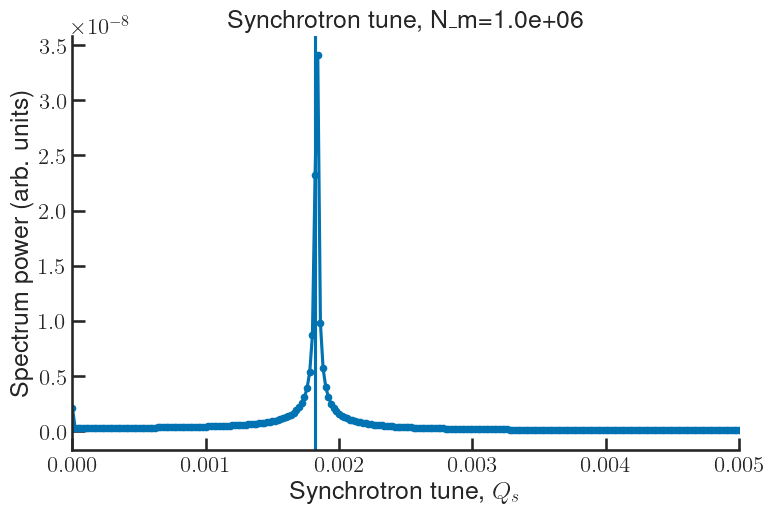

In [33]:
fftz = np.abs(np.fft.rfft(m[4,:]))
fftfreqz = np.fft.rfftfreq(m[4,:].shape[0])
fig, ax = plt.subplots(1, 1)
ax.plot(fftfreqz, fftz, marker='.')
ax.set_xlim(0, 5e-3)
ax.axvline(1.82e-3)
print(Q_S)
ax.set_ylabel('Spectrum power (arb. units)')
ax.set_xlabel('Synchrotron tune, $Q_s$')
ax.title.set_text('Synchrotron tune, N_m={:.1e}'.format(n_macroparticles))
plt.savefig(FOLDER_FIG+'synchrotron_tune(Qp_y={:}).pdf'.format(int(Qp_y)))

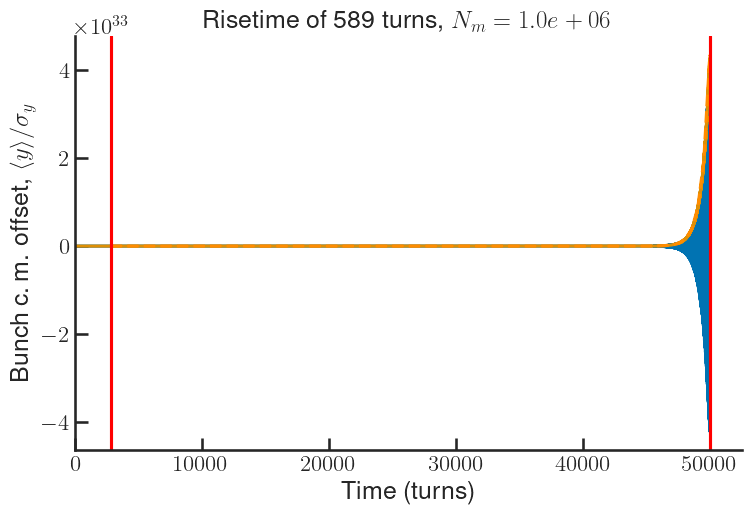

In [27]:
fig, ax = plt.subplots()
ax.plot(m[2,:]/std[2, 0])
min_level = 0.05
signal = np.sqrt(m[2,:]**2+(BETA_Y_SMOOTH*m[3,:])**2)/std[2,0]
smoothing_window_size = 200
risetime = fit_risetime(signal,
                      min_level=min_level, 
                      smoothing_window_size=smoothing_window_size,
                      matplotlib_axis=ax)
ax.set_xlabel('Time (turns)')
ax.set_ylabel('Bunch c.\,m. offset, $\langle y \\rangle/\sigma_y$')
ax.set_xlim(0, )
ax.title.set_text('Risetime of {:} turns, $N_m={:.1e}$'.format(int(risetime), n_macroparticles))
plt.savefig(FOLDER_FIG+'beam_offset(Qp_y={:}).pdf'.format(Qp_y))

['$Q_y-5Q_s$', '$Q_y-4Q_s$', '$Q_y-3Q_s$', '$Q_y-2Q_s$', '$Q_y-Q_s$', '$Q_y$', '$Q_y+Q_s$', '$Q_y+2Q_s$', '$Q_y+3Q_s$', '$Q_y+4Q_s$', '$Q_y+5Q_s$']


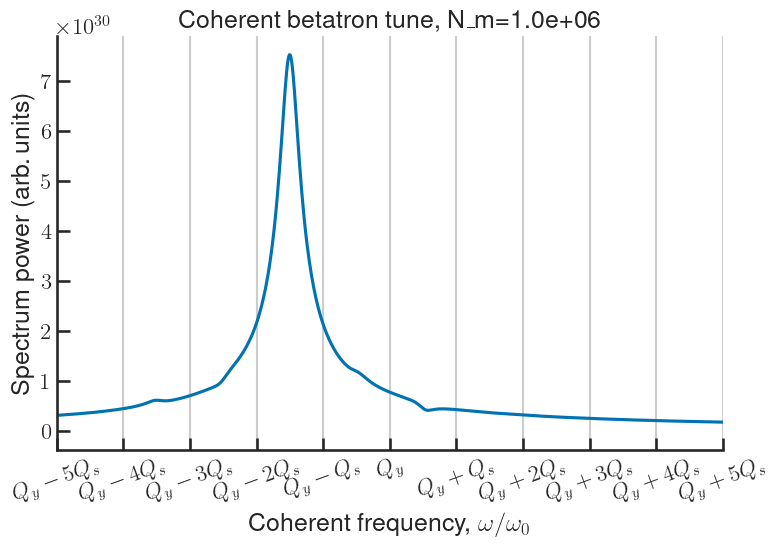

In [28]:
%matplotlib inline
ffty = np.abs(np.fft.rfft(m[2,:]))
fftfreqy = np.fft.rfftfreq(m[2,:].shape[0])
fig, ax = plt.subplots(1, 1)
ax.plot(fftfreqy, ffty)
# ax.set_xlim(0, 5e-3)
Q_S=1.82e-3
multiple_of = 5
ax.set_xlabel('Coherent frequency, $\omega/\omega_0$')
ax.set_ylabel('Spectrum power (arb.\,units)')
ax.set_xlim(Q_Y-np.floor(Q_Y)-multiple_of*Q_S, Q_Y-np.floor(Q_Y)+multiple_of*Q_S)
ax.set_xticks(np.linspace(Q_Y-np.floor(Q_Y)-multiple_of*Q_S, Q_Y-np.floor(Q_Y)+multiple_of*Q_S, 2*multiple_of+1))
labels = ['$Q_y-Q_s$', '$Q_y$', '$Q_y+Q_s$']
for i in range(2, multiple_of+1):
    labels.insert(0, '$Q_y-{:}Q_s$'.format(i))
    labels.append('$Q_y+{:}Q_s$'.format(i))
print(labels)
ax.set_xticklabels(labels, rotation = 20)
ax.title.set_text('Coherent betatron tune, N_m={:.1e}'.format(n_macroparticles))
ax.xaxis.grid(True)
plt.savefig(FOLDER_FIG+'coherent_betatron_tune(Qp_y={:}).pdf'.format((Qp_y)))

In [29]:
with hp.File(filename+'.hdf5') as f:
    print(f['WakePotentialData_0'].keys())
    dip_y = f['WakePotentialData_0']['dipole_Wydip'][:]
    profile_y = f['WakePotentialData_0']['profile_Wydip'][:]
    tau_y = f['WakePotentialData_0']['tau_Wydip'][:]

<KeysViewHDF5 ['Wydip', 'dipole_Wydip', 'profile_Wydip', 'tau_Wydip', 'time']>


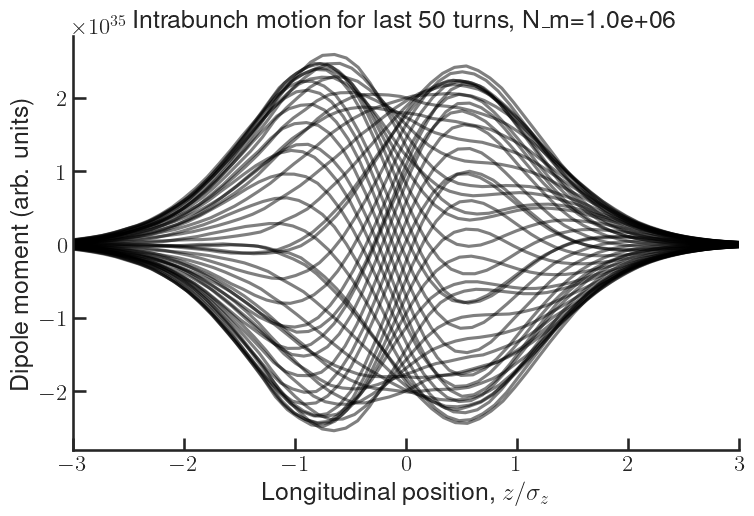

In [30]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
linenumber = 50
linestart = 44950 
lineend =45000
# ax.plot((tau_y[:,-linenumber:])*c/SIGMA_Z, profile_y[:,-linenumber:], color='black', alpha=0.5)

ax.plot((tau_y[:,linestart:lineend])*c/SIGMA_Z, dip_y[:,linestart:lineend]*profile_y[:,linestart:lineend], color='black', alpha=0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('Longitudinal position, $z/\sigma_z$')
ax.set_ylabel('Dipole moment (arb. units)')
ax.title.set_text('Intrabunch motion for last {:} turns, N_m={:.1e}'.format(linenumber, n_macroparticles))
plt.savefig(FOLDER_FIG+'intrabunch_motion(Qp_y={:}).pdf'.format(Qp_y))